# MLB Regression

This project uses a dataset of statistics for Major League Baseball teams. I will include the dataset as a .csv file in this repository.

 After some exploratory analysis, I break down the relationship between a team's Earned Run Average (ERA) and Wins Above Replacement (WAR) against their season win total (W) using both single and multiple linear regression models.

In [4]:
#Import the Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import scipy.stats
from scipy.stats import stats

In [5]:
MLB = pd.read_csv("MLB.csv")
MLB

,Unnamed: 0,Season,Team,W,L,SV,IP,ERA,FIP,WAR
0,2,2015,STL,100,62,62,1464.2,2.94,3.48,20.6
1,3,2018,HOU,103,59,46,1455.0,3.11,3.23,28.6
2,4,2016,CHC,103,58,38,1459.2,3.15,3.77,18.8
3,5,2015,PIT,98,64,54,1489.2,3.23,3.36,19.5
4,6,2017,CLE,102,60,37,1440.2,3.30,3.33,30.4
...,...,...,...,...,...,...,...,...,...,...
145,147,2019,KCR,59,103,37,1425.0,5.20,4.90,7.9
146,148,2019,DET,47,114,31,1433.0,5.26,4.84,11.6
147,149,2017,DET,64,98,32,1420.1,5.36,4.73,11.5
148,150,2019,COL,71,91,28,1448.2,5.58,5.23,6.3


In [7]:
description = MLB.describe()
description

,Unnamed: 0,Season,W,L,SV,IP,ERA,FIP,WAR
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.00000,150.000000,150.000000
mean,76.500000,2017.000000,80.973333,80.973333,41.140000,1445.677333,4.23500,4.234933,14.330667
std,43.445368,1.418951,12.675054,12.628904,7.530725,13.224459,0.53391,0.437348,5.476612
min,2.000000,2015.000000,47.000000,54.000000,25.000000,1412.200000,2.94000,3.230000,1.000000
25%,39.250000,2016.000000,71.000000,71.250000,36.000000,1437.125000,3.82000,3.970000,10.025000
50%,76.500000,2017.000000,81.000000,81.000000,41.000000,1443.550000,4.18000,4.220000,14.150000
75%,113.750000,2018.000000,91.000000,91.000000,46.000000,1454.550000,4.63000,4.525000,18.475000
max,151.000000,2019.000000,108.000000,115.000000,62.000000,1489.200000,5.67000,5.560000,30.400000


<AxesSubplot:>

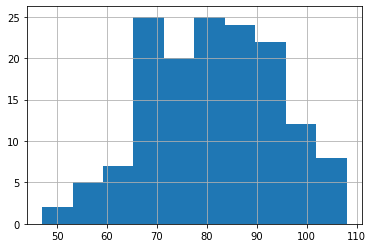

In [9]:
#Histogram of Wins
MLB["W"].hist()

<AxesSubplot:>

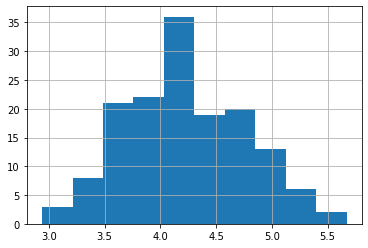

In [10]:
#Histogram for ERA
MLB["ERA"].hist()

<AxesSubplot:>

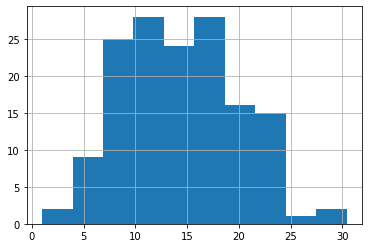

In [11]:
#Histogram for Wins Above Replacement
MLB["WAR"].hist()

<AxesSubplot:xlabel='ERA', ylabel='W'>

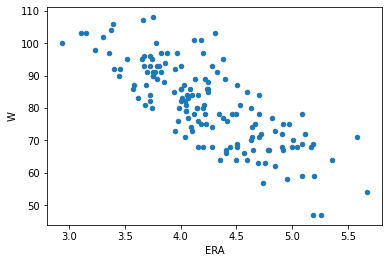

In [12]:
#Plottting ERA against Wins
MLB.plot.scatter(x = "ERA", y = "W")

<AxesSubplot:xlabel='WAR', ylabel='W'>

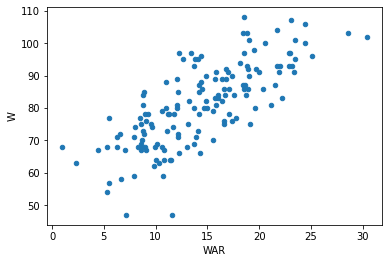

In [13]:
#Plotting Wins Above Replacement against Wins
MLB.plot.scatter(x = "WAR", y = "W")

There seems to be a negative correlation between Wins and ERA, and a positive correlation between Wins and WAR.

The relationship between Wins and ERA tells us that the more runs let through by the pitcher in a game, the less likely that pitcher's team is to win. Conversely, the higher the WAR value of a team, the higher the likelyhood of winning a game.

In [14]:
#Correlation Matrix
cor = MLB.corr()
cor

,Unnamed: 0,Season,W,L,SV,IP,ERA,FIP,WAR
Unnamed: 0,1.000000,0.258563,-0.769663,0.769858,-0.592083,-0.514336,0.980132,0.891618,-0.745739
Season,0.258563,1.000000,0.001493,0.001498,-0.160786,0.078542,0.279497,0.340558,-0.000173
W,-0.769663,0.001493,1.000000,-0.999680,0.633547,0.501172,-0.780843,-0.678682,0.753243
L,0.769858,0.001498,-0.999680,1.000000,-0.632396,-0.496348,0.781417,0.679728,-0.754419
SV,-0.592083,-0.160786,0.633547,-0.632396,1.000000,0.348657,-0.620801,-0.574121,0.514135
IP,-0.514336,0.078542,0.501172,-0.496348,0.348657,1.000000,-0.506675,-0.471604,0.385179
ERA,0.980132,0.279497,-0.780843,0.781417,-0.620801,-0.506675,1.000000,0.904599,-0.742999
FIP,0.891618,0.340558,-0.678682,0.679728,-0.574121,-0.471604,0.904599,1.000000,-0.811927
WAR,-0.745739,-0.000173,0.753243,-0.754419,0.514135,0.385179,-0.742999,-0.811927,1.000000


In [16]:
#Creation of Regression Model using ERA as the x-variable to predict wins.

sd_w = MLB["W"].std()
sd_era = MLB["ERA"].std()
mean_w = MLB["W"].mean()
mean_era = MLB["ERA"].mean()
r = -0.780843
model = LinearRegression()
reg1 = model.fit(MLB[["ERA"]], MLB["W"])

b1_ERA = reg1.coef_
b0_ERA = reg1.intercept_

print("The intercept (ß0) = " + str(b0_ERA) + ".")
print("The slope (ß1) = " + str(b1_ERA) + ".")

The intercept (ß0) = 159.4785641865975.
The slope (ß1) = [-18.53724459].


Regression model:
W = 157.48 - 18.54(ERA)

In [17]:
#Creation of Regression Model using WAR as the x-varaible to predict wins.
sd_war = MLB["WAR"].std()
mean_war = MLB["WAR"].mean()
r2 = 0.753243

reg = LinearRegression().fit(MLB[["WAR"]], MLB["W"])
reg.coef_
reg.intercept_
b1_WAR = reg.coef_
b0_WAR = reg.intercept_

print("The intercept (ß0) = " + str(b0_WAR) + ".")
print("The slope (ß1) = " + str(b1_WAR) + ".")

The intercept (ß0) = 55.99062817707242.
The slope (ß1) = [1.74330377].


Regression model: W = 55.99 + 1.74(WAR)

In [18]:
#t-Test Statistic and p-value calculations for ERA to predict wins.
ts_b0_ERA = reg1.intercept_ / 5.204
ts_b1_ERA = reg1.coef_ / 1.219
df1 = len(MLB["W"]) - 2
p_value_b0_ERA = scipy.stats.t.sf(ts_b0_ERA, df1)*2
p_value_b1_ERA = scipy.stats.t.sf(abs(ts_b1_ERA), df1)*2

print("The t-Test Statistic for ß0 in W~ERA is " + str(ts_b0_ERA) + ".")
print("The t-Test Statistic for ß1 in W~ERA is " + str(ts_b1_ERA) + ".")
print("The p-value for ß0 in W~ERA is " + str(p_value_b0_ERA) + ".")
print("The p-value for ß1 in W~ERA is " + str(p_value_b1_ERA) + ".")

The t-Test Statistic for ß0 in W~ERA is 30.645381281052558.
The t-Test Statistic for ß1 in W~ERA is [-15.20692748].
The p-value for ß0 in W~ERA is 5.776406818103569e-66.
The p-value for ß1 in W~ERA is [4.79161795e-32].


In [20]:
#t-Test Statistic and p-value calculations for WAR to predict wins.

ts_b0_WAR = reg.intercept_ / 1.9189
ts_b1_WAR = reg.coef_ / 0.1251

p_value_b0_WAR = scipy.stats.t.sf(ts_b0_WAR, df1)*2
p_value_b1_WAR = scipy.stats.t.sf(ts_b1_WAR, df1)*2

print("The t-Test Statistic for ß0 in W~WAR is " + str(ts_b0_WAR) + ".")
print("The t-Test Statistic for ß1 in W~WAR is " + str(ts_b1_WAR) + ".")
print("The p-value for ß0 in W~ERA is " + str(p_value_b0_WAR) + ".")
print("The p-value for ß1 in W~ERA is " + str(p_value_b1_WAR) + ".")

The t-Test Statistic for ß0 in W~WAR is 29.178502359201847.
The t-Test Statistic for ß1 in W~WAR is [13.9352819].
The p-value for ß0 in W~ERA is 2.9479146729524473e-63.
The p-value for ß1 in W~ERA is [1.00070344e-28].


The slope of the ERA regression is statistically significant at 4.7e-33. The intercept of the ERA regression is even more significant at 5.7e-66. 
Similarly the slope of the WAR regression is significant at 1.0e-28, and the intercept even more significant at 2.9e-63. 

Every estimate is significant beyond a 1% level.

<AxesSubplot:xlabel='ERA', ylabel='W'>

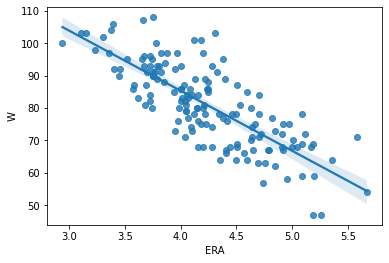

In [22]:
#Scatter Plot of W~ERA with Single Linear Regression (SLR)
sns.regplot(x = MLB["ERA"], y = MLB["W"])

<AxesSubplot:xlabel='WAR', ylabel='W'>

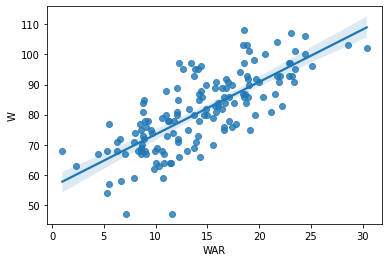

In [23]:
#Scatter Plot of W~WAR with SLR
sns.regplot(x = MLB["WAR"], y = MLB["W"])

In [24]:
#Creation of Model using ERA+WAR to predict wins

xvals = MLB[["ERA", "WAR"]]
reg2 = model.fit(xvals, MLB["W"])
MLR_b0 = reg2.intercept_
MLR_bi = reg2.coef_

print("The intercept (ß0) = " + str(MLR_b0) + ".")
print("The coefficient estimates (ß1 & ß2) are " + str(MLR_bi) + ".")

The intercept (ß0) = 117.80127404374933.
The coefficient estimates (ß1 & ß2) are [-11.72203031   0.8942262 ].


Regression model: W = 117.801 - 11.72(ERA) + 0.89(WAR)

In [25]:
#Code for computing the residuals.
#residuls  = predicted wins - actual wins
MLB["residuals"] = MLB["W"] - reg2.predict(MLB[["ERA", "WAR"]])
MLB["residuals"].sum()

6.394884621840902e-14

In [28]:
#Predicting number of wins for a team with ERA = 3.21 and WAR = 25.24
win_prediction = 117.801 - 11.72*(3.21) + 0.89*(25.24)
win_prediction = round(win_prediction)

print("The predicted win total with a team ERA of 3.21 and a team WAR of 25.24 is " + str(win_prediction) + " wins.")


The predicted win total with a team ERA of 3.21 and a team WAR of 25.24 is 103 wins.
